C:\Users\Admin\AppData\Local\Temp\ipykernel_1112\2817380863.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Unnamed: 0  visits  gender   age  income  illness  reduced  health private  \
0           1       1  female  0.19    0.55        1        4       1     yes   
1           2       1  female  0.19    0.45        1        2       1     yes   
2           3       1    male  0.19    0.90        3        0       0      no   
3           4       1    male  0.19    0.15        1        0       0      no   
4           5       1    male  0.19    0.45        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no  

Total Number of People by Count of Illness:
 illness
0    1554
1    1638
2     946
3     542
4     274
5     236
Name: count, dtype: int64


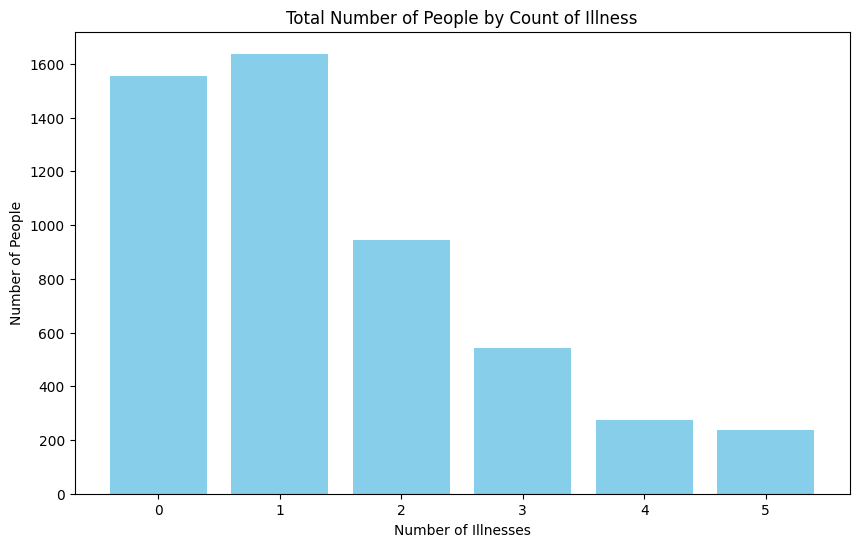

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './DoctorVisits-DA.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Problem Statement 2: Find out the total number of people based on their count of illness
# Group data by the count of illnesses and find the total number of people in each group
illness_counts = data['illness'].value_counts().sort_index()

# Display the results
print("\nTotal Number of People by Count of Illness:\n", illness_counts)

# Plotting the distribution of illness counts
plt.figure(figsize=(10, 6))
plt.bar(illness_counts.index, illness_counts.values, color='skyblue')
plt.title('Total Number of People by Count of Illness')
plt.xlabel('Number of Illnesses')
plt.ylabel('Number of People')
plt.xticks(illness_counts.index)
plt.show()



Gender-wise Illness Counts:
 illness    0    1    2    3    4    5
gender                               
female   679  834  531  333  167  158
male     875  804  415  209  107   78


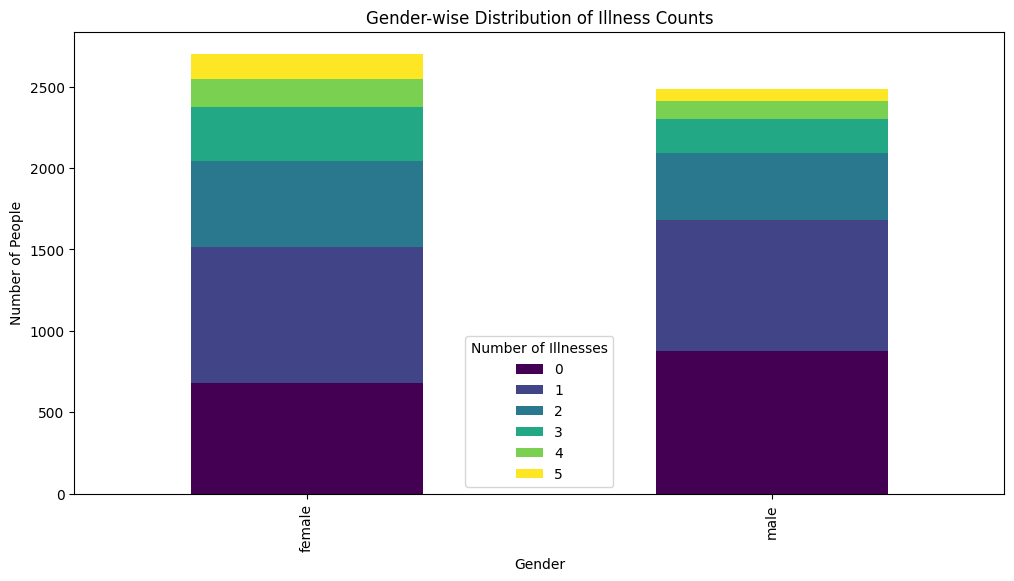

In [2]:
# Gender-wise illness analysis: Count the number of illnesses reported by each gender
gender_illness_counts = data.groupby('gender')['illness'].value_counts().unstack().fillna(0)

# Display the results
print("\nGender-wise Illness Counts:\n", gender_illness_counts)

# Plotting the gender-wise illness distribution
gender_illness_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Gender-wise Distribution of Illness Counts')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Number of Illnesses')
plt.show()



Total Number of Reduced Activity Days by Gender:
 gender
female    2636
male      1837
Name: reduced, dtype: int64


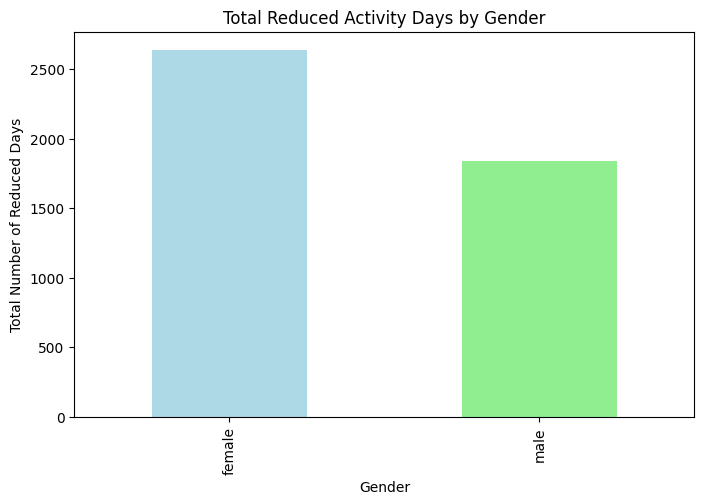

In [3]:
# Calculate the total number of reduced activity days for each gender
reduced_activity_by_gender = data.groupby('gender')['reduced'].sum()

# Display the results
print("\nTotal Number of Reduced Activity Days by Gender:\n", reduced_activity_by_gender)

# Plotting the reduced activity days by gender
plt.figure(figsize=(8, 5))
reduced_activity_by_gender.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Total Reduced Activity Days by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of Reduced Days')
plt.show()



Correlation Matrix:
             Unnamed: 0    visits       age    income   illness   reduced  \
Unnamed: 0    1.000000 -0.521645 -0.016322  0.074632 -0.290047 -0.245314   
visits       -0.521645  1.000000  0.124537 -0.076840  0.223552  0.418954   
age          -0.016322  0.124537  1.000000 -0.271073  0.204984  0.094745   
income        0.074632 -0.076840 -0.271073  1.000000 -0.148812 -0.047545   
illness      -0.290047  0.223552  0.204984 -0.148812  1.000000  0.218116   
reduced      -0.245314  0.418954  0.094745 -0.047545  0.218116  1.000000   
health       -0.194966  0.193272  0.018616 -0.085790  0.360110  0.280208   

              health  
Unnamed: 0 -0.194966  
visits      0.193272  
age         0.018616  
income     -0.085790  
illness     0.360110  
reduced     0.280208  
health      1.000000  


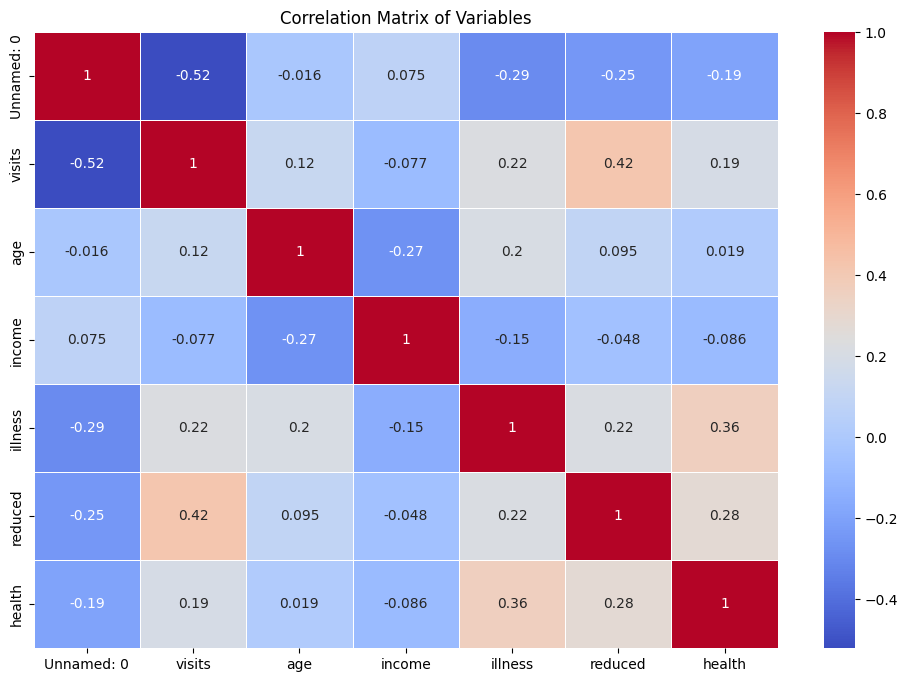

In [5]:
# Calculate the correlation matrix using only numeric columns
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot a heatmap for the correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()




Total Number of Visits by Gender:
 gender
female    978
male      588
Name: visits, dtype: int64


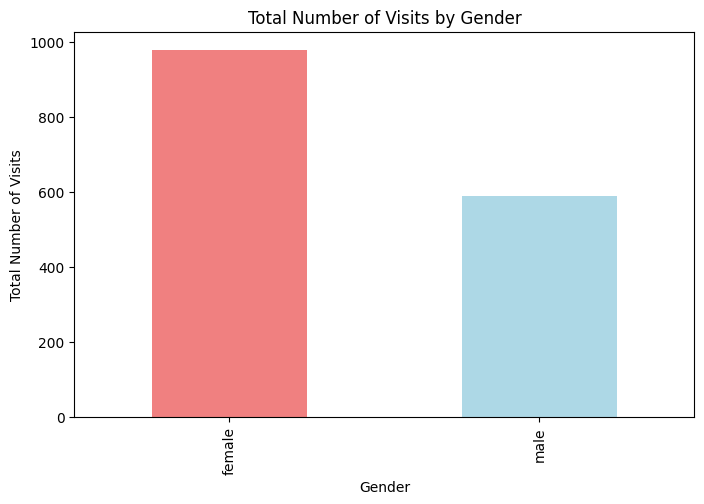

In [6]:
# Total number of visits made by each gender
visits_by_gender = data.groupby('gender')['visits'].sum()

# Display the results
print("\nTotal Number of Visits by Gender:\n", visits_by_gender)

# Plotting the number of visits by gender
plt.figure(figsize=(8, 5))
visits_by_gender.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Total Number of Visits by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of Visits')
plt.show()


In [ ]:
# Count the number of people with and without private health insurance
private_insurance_counts = data['private'].value_counts()

# Display the results
print("\nNumber of People with and without Private Health Insurance:\n", private_insurance_counts)

# Plotting the distribution of private health insurance
plt.figure(figsize=(8, 5))
private_insurance_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightpink'])
plt.title('Distribution of Private Health Insurance')
plt.ylabel('')
plt.show()
